In [16]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np

In [24]:
#  Displaying images using cv2_imshow
def showImage(title,img):
    cv2_imshow(img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [25]:
def overwriteOnimg(img,big):
    img_copy,temp,temp1=cv.split(img)
    height, width, depth = img.shape

    for i in range(0, height):
        for j in range(0, (width)):
            img_copy[i,j] = big[i,j]
    return img_copy

In [26]:
def undesired_objects (image,img):
    nbcomp, out, stats, centroids = cv.connectedComponentsWithStats(image, 4)
    sizes = stats[:, -1]

    max_label = 1
    max_size = sizes[1]
    for i in range(2, nbcomp):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]
            img2 = np.zeros(out.shape)
    img2[out == max_label] = 255

    img2=overwriteOnimg(img, img2) #make img2 with help of img with only 1 plane
    return img2

In [27]:
def bitwiseAndImages(img, big):
    '''
    bitwiseAndB = cv.bitwise_and(b,big)
    bitwiseAndG = cv.bitwise_and(g,big)
    bitwiseAndR = cv.bitwise_and(r,big)
    '''
    b,g,r=cv.split(img)


    bitwiseAndB=b
    bitwiseAndG=g
    bitwiseAndR=r
    height, width, depth = img.shape
    for i in range(0, height):
        for j in range(0, (width)):
            bitwiseAndR[i,j] = big[i,j] and r[i,j]
            bitwiseAndG[i,j] = big[i,j] and g[i,j]
            bitwiseAndB[i,j] = big[i,j] and b[i,j]

    bitwiseAnd = cv.merge([bitwiseAndR,bitwiseAndG,bitwiseAndB])
    return bitwiseAnd

In [28]:
def threshold(hsv):
    low=np.array([15,30,20])
    high=np.array([25,70,180])

    x=cv.inRange(hsv,low,high)
    return x

In [29]:
def whiteBlackgroung(bitwiseAnd,big):
    height, width, depth = bitwiseAnd.shape

    for i in range(0, height):
        for j in range(0, (width)):
            if(big[i,j]==0):
                bitwiseAnd[i,j,0]=255
                bitwiseAnd[i,j,1]=255
                bitwiseAnd[i,j,2]=255
    return bitwiseAnd

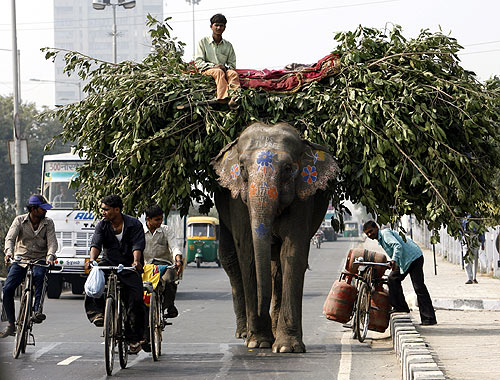

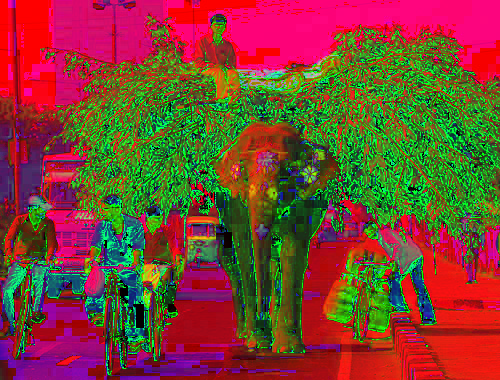

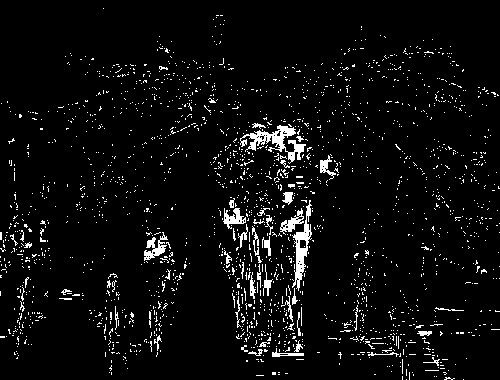

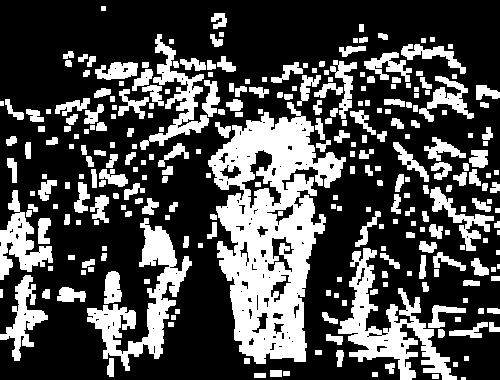

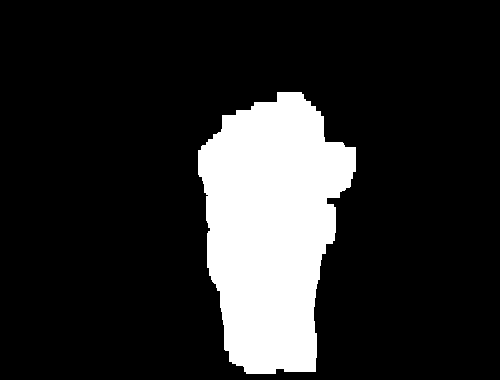

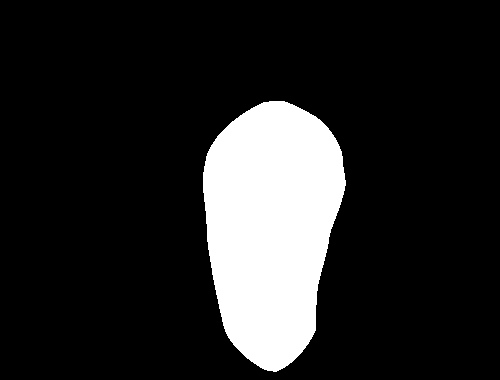

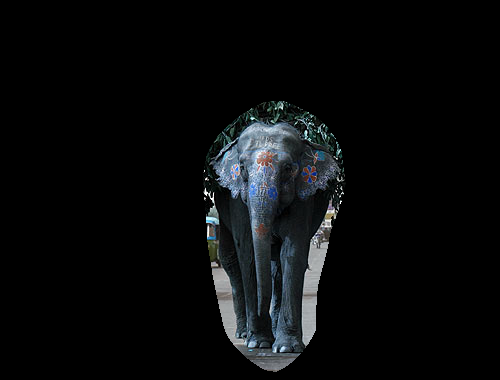

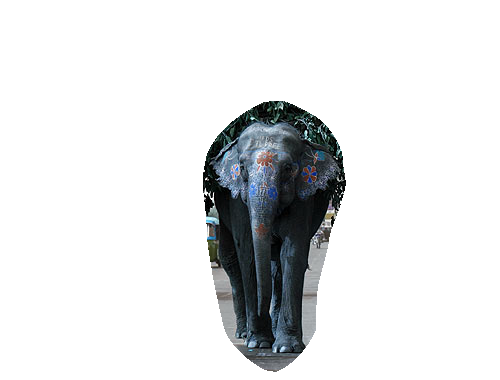

In [30]:
#MAIN
img = cv.imread("Assignment2.jpg")
showImage('rgb image',img)

hsv= cv.cvtColor(img,cv.COLOR_BGR2HSV)
showImage('hsvmage',hsv)

cv.imwrite('hsvImg.png', hsv)

x=threshold(hsv)
showImage('thresholdedImg',x)

kernel5 = np.ones((5,5), np.uint8)
kernel4 = np.ones((4,4), np.uint8)
kernel3 = np.ones((3,3), np.uint8)
kernel2 = np.ones((2,2), np.uint8)
kernel1 = np.ones((1,1), np.uint8)

img_erosion = cv.erode(x, kernel2, iterations=1)
img_dilation = cv.dilate(x, kernel5, iterations=1)

showImage('d',img_dilation)

big =undesired_objects (img_dilation,img)

big = cv.dilate(big, kernel5, iterations=5)
showImage('desiredImg', big)

big = cv.medianBlur(big, 81)
showImage('blurred', big)

bitwiseAnd = bitwiseAndImages(img, big)
showImage("AND", bitwiseAnd)

output=whiteBlackgroung(bitwiseAnd,big)
showImage('output',output)
